
<div align="center">

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dapivei/causal-infere/blob/main/sections/3_Probability_Statistics.ipynb)

</div>






# Probability, All Causes Model and Statistics

## Goals for today


- Probability: Conditional Variance and Independence
- Revisiting All Causes Model
- Statistics: Estimators, Bias/Variance, Consistency, WLLN, and CLT
---



In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Probability

### Conditional Variance


\begin{align}
 \text{Var}(Y|X) &= E[(Y - E[Y|X])^2 | X] \\
 &= E[Y^2|X] - (E[Y|X])^2
\end{align}


  Let's go through some simulations!

In [2]:
# Step 1: Generate synthetic data for (X, Y) pairs
np.random.seed(201)
X = np.random.randint(1, 6, size=100)  # Random values for X
epsilon = np.random.normal(0, 1, 100)  # Noise
Y = 2 * X + epsilon  # Y depends on X with some noise

# Step 2: Compute Conditional Expectation
def conditional_expectation(Y, X, value):
    return np.mean(Y[X == value])

# Step 3: Compute Conditional Variance
def conditional_variance(Y, X, value):
    E_Y_given_X = conditional_expectation(Y, X, value)
    return np.mean((Y[X == value] - E_Y_given_X)**2)

# Test conditional variance for specific values of X (e.g., X = 3)
values = [1, 2, 3, 4, 5]
for value in values:
  cond_var = conditional_variance(Y, X, value)
  print(f"Conditional Variance of Y given X = {value}: {cond_var}")

Conditional Variance of Y given X = 1: 0.47276544589467157
Conditional Variance of Y given X = 2: 0.819919742028449
Conditional Variance of Y given X = 3: 0.9370777623587184
Conditional Variance of Y given X = 4: 0.7220822662193119
Conditional Variance of Y given X = 5: 0.5304455160067575


In [3]:
# Alternative form of the conditional variance
def conditional_variance_alt(Y, X, value):
    return np.mean(Y[X == value]**2) - np.mean(Y[X == value])**2

# Test conditional variance for specific values of X (e.g., X = 3)
values = [1, 2, 3, 4, 5]
for value in values:
  cond_var = conditional_variance(Y, X, value)
  print(f"Conditional Variance of Y given X = {value}: {cond_var}")

Conditional Variance of Y given X = 1: 0.47276544589467157
Conditional Variance of Y given X = 2: 0.819919742028449
Conditional Variance of Y given X = 3: 0.9370777623587184
Conditional Variance of Y given X = 4: 0.7220822662193119
Conditional Variance of Y given X = 5: 0.5304455160067575


Additional property:

$$
\text{Var}(g(X) + h(X)Y | X) = h(X)^2 \text{Var}(Y | X)
$$

In [4]:
# Define g(X)
def g(X):
    return X ** 2  # Example function g(X)

# Define h(X)
def h(X):
    return 3 * X  # Example function h(X)

# New Conditional Variance with g(X) + h(X)Y
def conditional_variance_with_g_and_h(Y, X, value):
    E_Y_given_X = conditional_expectation(Y, X, value)
    return np.mean((g(X[X == value]) + h(X[X == value]) * Y[X == value]
                    - (g(X[X == value]) + h(X[X == value]) * E_Y_given_X))**2)

# Step 1: Calculate original conditional variance for X = 3
value = 3
original_cond_var = conditional_variance(Y, X, value)

# Step 2: Calculate conditional variance of g(X) + h(X)Y | X = 3
new_cond_var = conditional_variance_with_g_and_h(Y, X, value)

# Step 3: Verify that Var(g(X) + h(X)Y | X) = h(X)^2 * Var(Y | X)
h_X = h(value)  # Calculate h(X) for X = 3
expected_new_cond_var = h_X**2 * original_cond_var

print(f"Original Conditional Variance of Y given X = {value}: {original_cond_var}")
print(f"New Conditional Variance of g(X) + h(X)Y given X = {value}: {new_cond_var}")
print(f"Expected Conditional Variance of g(X) + h(X)Y given X = {value}: {expected_new_cond_var}")

Original Conditional Variance of Y given X = 3: 0.9370777623587184
New Conditional Variance of g(X) + h(X)Y given X = 3: 75.90329875105617
Expected Conditional Variance of g(X) + h(X)Y given X = 3: 75.9032987510562


### Independence

$$
P(X \in A, Y \in B) = P(X \in A)P(Y \in B)
$$

Also,

$$
P(Y|X) = P(Y) \ \ \text{and} \ \ P(X|Y) = P(X)
$$

If two variables are independent, then knowing the value of one variable does not provide additional information about the other.

It is also the case that independent variables have a covariance of 0 and are, therefore, uncorrelated.
- Proof in lecture slides by showing 

$$\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$$

Let's go through some simulations!

In [5]:
# Step 1: Simulate independent random variables
np.random.seed(201)
X_ind = np.random.randint(1, 7, 1000)  # Roll of die 1
Y_ind = np.random.randint(1, 7, 1000)  # Roll of die 2

# Step 2: Calculate covariance of independent variables
cov_ind = np.cov(X_ind, Y_ind)[0, 1]
print(f"Covariance of independent variables: {cov_ind}")

# Step 3: Simulate dependent variables
X_dep = np.random.randint(1, 10, 1000)
Y_dep = 2 * X_dep + np.random.normal(0, 1, 1000)

# Calculate covariance of dependent variables
cov_dep = np.cov(X_dep, Y_dep)[0, 1]
print(f"Covariance of dependent variables: {cov_dep}")

Covariance of independent variables: -0.09712712712712736
Covariance of dependent variables: 12.798416177120512


We see that independence implies 0 covariance and uncorrelatedness.

However, the converse statement is false. Independence is not necessary for uncorrelatedness.

Covariance between X and Y: -5.442179332610452e-06


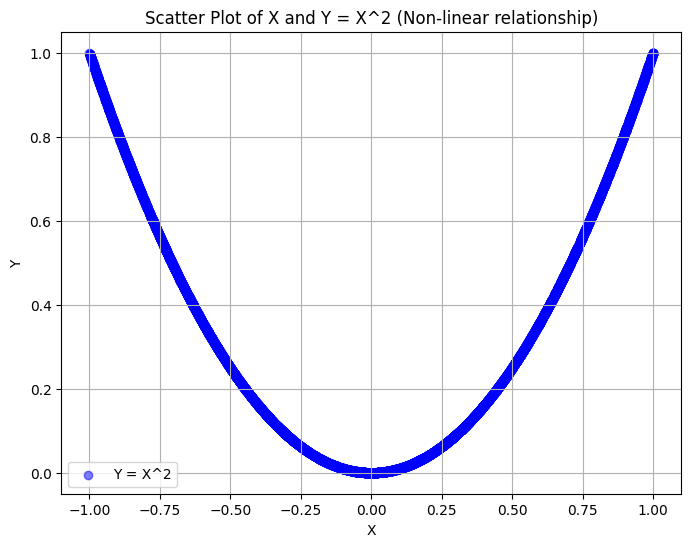

In [6]:
# Generate X uniformly from [-1, 1]
np.random.seed(201)
X = np.random.uniform(-1, 1, 10000)

# Define Y as X^2
Y = X**2

# Calculate covariance
cov_XY = np.cov(X, Y)[0, 1]
print(f"Covariance between X and Y: {cov_XY}")

# Create a scatter plot to visualize the relationship between X and Y
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Y = X^2')
plt.title('Scatter Plot of X and Y = X^2 (Non-linear relationship)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

See examples (dependent but uncorrelated) from the third row in the following picture.

![Indep](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png)

## Revisiting All Causes Model

### Definition

All causes model:

$$Y(S, U)$$

where $Y$ is the outcome, $S$ is the state of the world, and $U$ is other factors we observe that influence $Y$.

Also, for simplicity, consider $S$ as a binary treatment variable (0 or 1).

Causal quantities of interest:


\begin{align}
\text{ATE} &= E[Y(S=1, U) - Y(S=0, U)]\\
\text{ATT} &= E[Y(S=1, U) - Y(S=0, U)|S=1]\\
\text{ATU} &= E[Y(S=1, U) - Y(S=0, U)|S=0]
\end{align}


### Simulation

Using the same example from lecture, we will show how computing only association based on observational data does not give us the true underlying causal effect.

- $Y$ is continuous income.
- $S$ is binary college status. (1 = went to college)
- $U$ is binary family status. (1 = wealthy family)

We can see that the true causal effect from college status to income of people will be confounded by the third variable on family status as it is a common cause of both the treatment and outcome, i.e., a wealthy family leads to higher income and more likely to go to college.

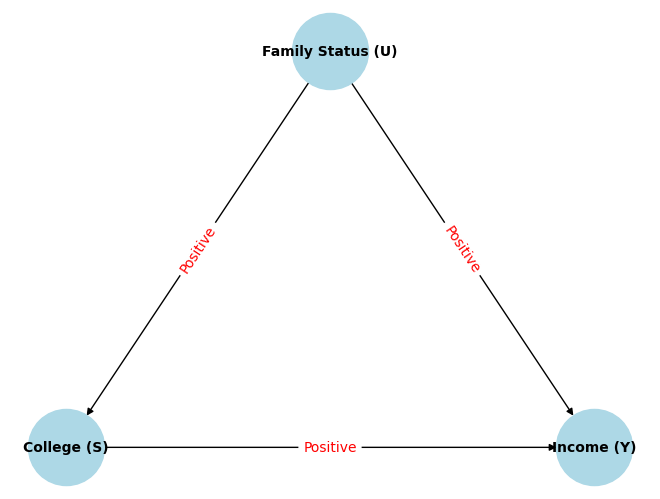

In [7]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Family Status (U)")
G.add_node("College (S)")
G.add_node("Income (Y)")

# Add directed edges representing causal relationships
G.add_edge("Family Status (U)", "College (S)")
G.add_edge("Family Status (U)", "Income (Y)")
G.add_edge("College (S)", "Income (Y)")

# Draw the graph
pos = {
    "Family Status (U)": (0, 1),
    "College (S)": (-1, 0),
    "Income (Y)": (1, 0),
}

labels = {
    ("Family Status (U)", "College (S)"): "Positive",
    ("Family Status (U)", "Income (Y)"): "Positive",
    ("College (S)", "Income (Y)"): "Positive",
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color="red")
plt.show()

Now, let's generate some sythetic data corresponding to this data generative process.

In [8]:
# Step 1: Simulate family status (rich=1, poor=0)
np.random.seed(42)
n = 1000
family_status = np.random.binomial(1, 0.4, n)  # 40% rich, 60% poor

# Step 2: Simulate college attendance based on family status (rich more likely to attend college)
college = np.random.binomial(1, 0.7 * family_status + 0.3 * (1 - family_status), n)

# Step 3: Simulate income based on family status and college attendance

noise = np.random.normal(0, 5000, n)  # Noise to add to income
income_observe = (50000 + 30000 * college + 20000 * family_status + noise)
income_college = (50000 + 30000 * 1 + 20000 * family_status + noise)

# For people who went to college (treated group), compared to the untreated,
# they would have higher income in the counterfactual world where they did not go to college
income_no_college = (50000 + 30000 * 0 + 10000 * college + 20000 * family_status + noise)

# Create a DataFrame for clarity
df = pd.DataFrame({
    'Family_Status': family_status,  # 1 = rich, 0 = poor
    'College': college,  # 1 = went to college, 0 = did not go to college
    'Income_Observe': income_observe,
    'Income_College': income_college,
    'Income_No_College': income_no_college
})

We can calculate the true ATE, ATT, and ATU based on the perfect knowledge we have on the observed and conuterfactual outcomes.

In [9]:
# Step 4: Compute ATE, ATT, ATU
# TRUE ATE:
ATE = df['Income_College'].mean() - df['Income_No_College'].mean()

# ATT:
ATT = df[(df['College'] == 1)]['Income_College'].mean() - df[(df['College'] == 1)]['Income_No_College'].mean()

# ATU:
ATU = df[(df['College'] == 0)]['Income_College'].mean() - df[(df['College'] == 0)]['Income_No_College'].mean()

# Print the results
print(f"TRUE Average Treatment Effect (ATE): {ATE:.2f}")
print(f"TRUE Average Treatment Effect on the Treated (ATT): {ATT:.2f}")
print(f"TRUE Average Treatment Effect on the Untreated (ATU): {ATU:.2f}")

TRUE Average Treatment Effect (ATE): 25560.00
TRUE Average Treatment Effect on the Treated (ATT): 20000.00
TRUE Average Treatment Effect on the Untreated (ATU): 30000.00


What happens if we only have access to the observed treatment and outcome with hidden confounding?

In [10]:
# Step 5: Compute association by conditioning
# Biased ATE using only what was obserevd:
Association = df[df['College'] == 1]['Income_Observe'].mean() - df[df['College'] == 0]['Income_Observe'].mean()

# Print the results
print(f"Biased Average Treatment Effect (ATE): {Association:.2f}")

Biased Average Treatment Effect (ATE): 37639.89


If we have access to potential confounders, we can condition them. (More on this in later lectures)

In [11]:
# Step 6: Condition on confounder - family status

Association = df[(df['College'] == 1) & (df['Family_Status'] == 1)]['Income_Observe'].mean() - df[(df['College'] == 0) & (df['Family_Status'] == 1)]['Income_Observe'].mean()

# Print the results
print(f"Association for those with family_status = 1: {Association:.2f}")

Association = df[(df['College'] == 1) & (df['Family_Status'] == 0)]['Income_Observe'].mean() - df[(df['College'] == 0) & (df['Family_Status'] == 0)]['Income_Observe'].mean()

# Print the results
print(f"Association for those with family_status = 0: {Association:.2f}")

Association for those with family_status = 1: 30553.75
Association for those with family_status = 0: 30308.08


## Statistics

###  Statistics v.s. Probability



Suppose that $X_1, ..., X_n$ are independent random variables with some cdf $F$.

**Probability**: $F$ is known and we can (in theory) calculate probabilities involving the random variables $X_1, ..., X_n$, e.g., $P(a \leq \bar{X} \leq b)$.
- Knowledge of the population (i.e. F) gives us information about the nature of the samples from that population.

**Statistics**: $F$ is unknown and we observe outcomes of the random variables $x_1, ..., x_n$.
- We use the information in the data to estimate or infer properties of the unknown distribution $F$.


### Means of Gaussian Distributions

A Gaussian random variable has the following probability density function with two parameters:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma}} \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Given i.i.d samples $x_1, ..., x_n$ from a Gaussian distribution, we would like to estimate the mean of the distribution.

A good estimator $\hat{\mu}_n$ for the mean of Gaussian is the sample mean $
\hat{\mu}_n = \frac{1}{n} \sum_{i=1}^{n} x_i
$.

This is intuitive, and you can show this via maximum likelihood estimation.

In [12]:
# Step 1: Generate a sample of n data points from a Gaussian distribution
np.random.seed(42)
n = 1000
true_mu = 5  # True population mean
true_sigma = 2  # True population standard deviation
data = np.random.normal(loc=true_mu, scale=true_sigma, size=n)

# Step 2: Calculate the sample mean
sample_mean = np.mean(data)
print(f"Sample Mean: {sample_mean}")

# Step 3: Simulate multiple samples to show unbiasedness
num_simulations = 1000
sample_means = [np.mean(np.random.normal(true_mu, true_sigma, n)) for _ in range(num_simulations)]
print(f"Average of Sample Means (across simulations): {np.mean(sample_means)}")

Sample Mean: 5.0386641116446516
Average of Sample Means (across simulations): 4.996833232634605


This is an unbiased estimator for $\mu$, i.e., the expected value of the sample mean equals the true mean.

$$
\text{Bias}(\hat{\mu}_n) = E[\hat{\mu}_n] - \mu = 0
$$

Also, the variance of the sample mean is simply the variance of the Gaussian divide by the sample size (the sample mean gets close to the true mean as we increase sample size).

$$
\text{Var}(\hat{\mu}_n) = \frac{\sigma^2}{n}
$$

See lecture slides for proofs.

In [13]:
# Step 4: Calculate the bias of the sample mean
bias = np.mean(sample_means) - true_mu
print(f"Bias of the Sample Mean: {bias}")

# Step 5: Calculate the variance of the sample mean
variance = np.var(sample_means)
print(f"Variance of the Sample Mean: {variance}")

# Theoretical variance of the sample mean for Gaussian distribution
theoretical_variance = (true_sigma ** 2) / n
print(f"Theoretical Variance: {theoretical_variance}")

Bias of the Sample Mean: -0.0031667673653945627
Variance of the Sample Mean: 0.004145252787930502
Theoretical Variance: 0.004


This estimator is also consistent based on the Weak Law of Large Number (WLLN).

$$
\lim_{n \to \infty} P\left( |\overline{X}_n - \mu| > \epsilon \right) = 0
$$

[Proof](https://en.wikipedia.org/wiki/Law_of_large_numbers#Proof_using_Chebyshev's_inequality_assuming_finite_variance) using Chebyshev's inequality

Sample Means for different sizes: [np.float64(4.710905546907496), np.float64(5.414024467021665), np.float64(4.782722755544523), np.float64(4.567195741630208), np.float64(5.000857451210413), np.float64(5.077863617662095), np.float64(5.019700795749149), np.float64(5.026006940904063), np.float64(5.002327783361207), np.float64(4.997753484426097)]


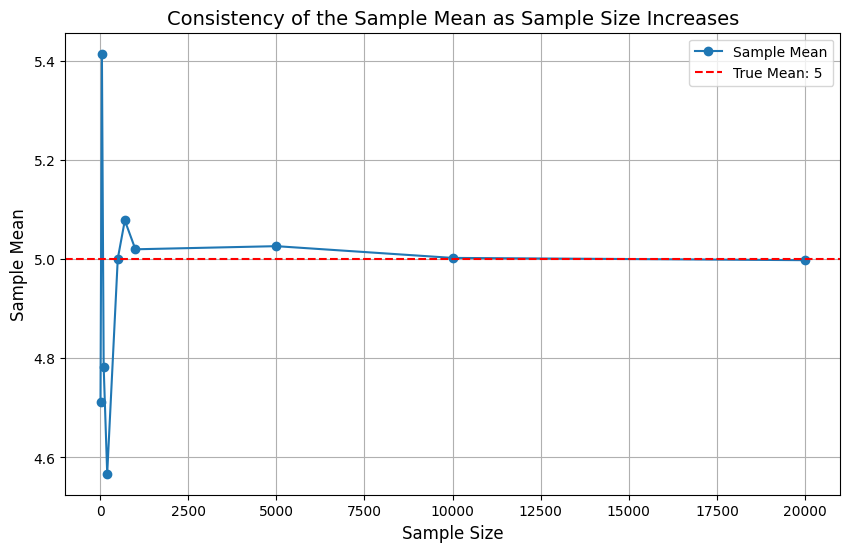

In [14]:
# Simulate increasing sample sizes and calculate the sample mean for each size
np.random.seed(201)
sample_sizes = [10, 50, 100, 200, 500, 700, 1000, 5000, 10000, 20000]
means = []

for size in sample_sizes:
    sample = np.random.normal(loc=true_mu, scale=true_sigma, size=size)
    means.append(np.mean(sample))

print(f"Sample Means for different sizes: {means}")

plt.figure(figsize=(10, 6))

# Plot the sample means for each sample size
plt.plot(sample_sizes, means, marker='o', linestyle='-', label='Sample Mean')

# Add horizontal line for the true mean
plt.axhline(y=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')

# Add labels and title
plt.title('Consistency of the Sample Mean as Sample Size Increases', fontsize=14)
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Sample Mean', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

Central Limit Theorem (CLT) states that for large $n$:

$$
\hat{\mu}_n \sim N\left(\mu, \frac{\sigma^2}{n}\right)
$$

In this case, we don't actually need CLT to know that the sampling distribution approximates Gaussian. We know the samples are Gaussian, and the sample mean is just a linear combination of these Gaussians. It follows exactly a Gaussian distribution.

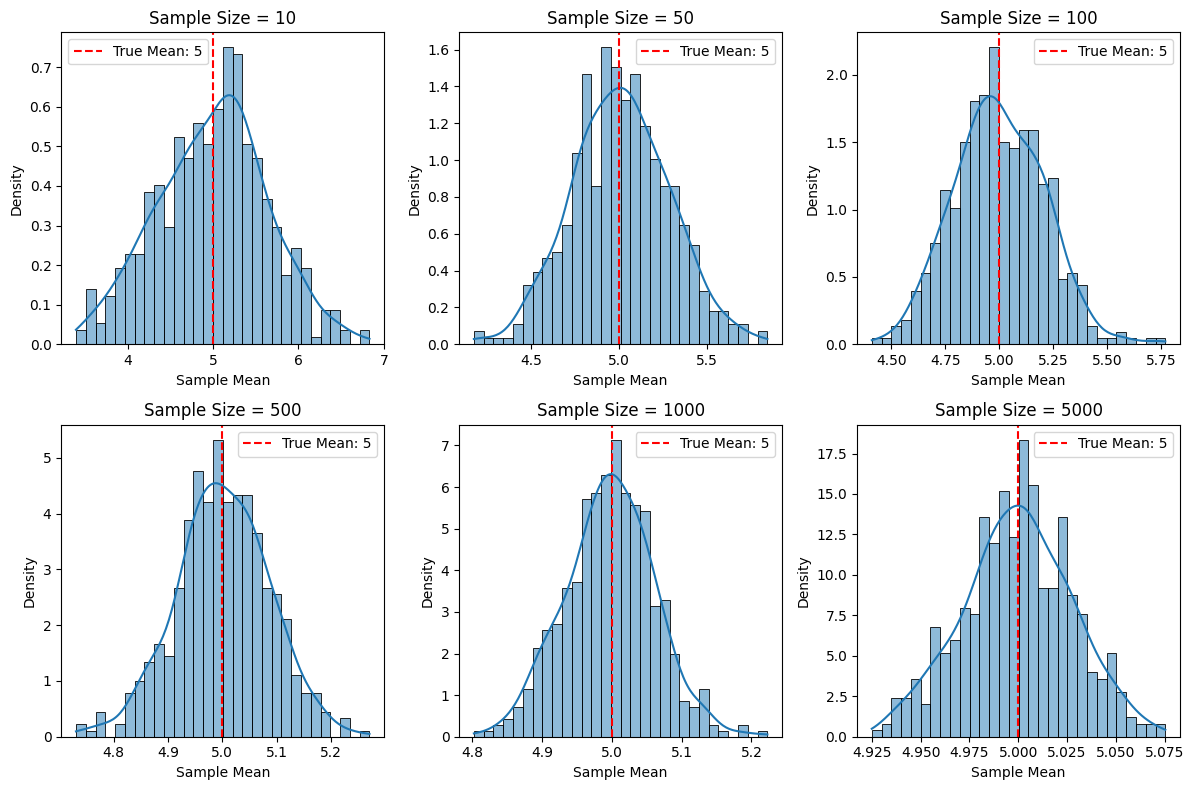

In [15]:
n_trials = [10, 50, 100, 500, 1000, 5000]  # Sample sizes
num_simulations = 500  # Number of simulations to estimate the distribution of the sample mean

# Generate sample means for different sample sizes
sample_means_dict = {}

for n in n_trials:
    sample_means = [np.mean(np.random.normal(true_mu, true_sigma, n)) for _ in range(num_simulations)]
    sample_means_dict[n] = sample_means

# Plot histograms of the sample means for different sample sizes
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_trials, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sample_means_dict[n], bins=30, kde=True, stat="density")
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.axvline(x=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')
    plt.legend()

plt.tight_layout()
plt.show()

The real power of CLT comes from the fact that the original samples can come from a potentially unknown and very complex data distribution.

Central Limit Theorem with non-Gaussian Data

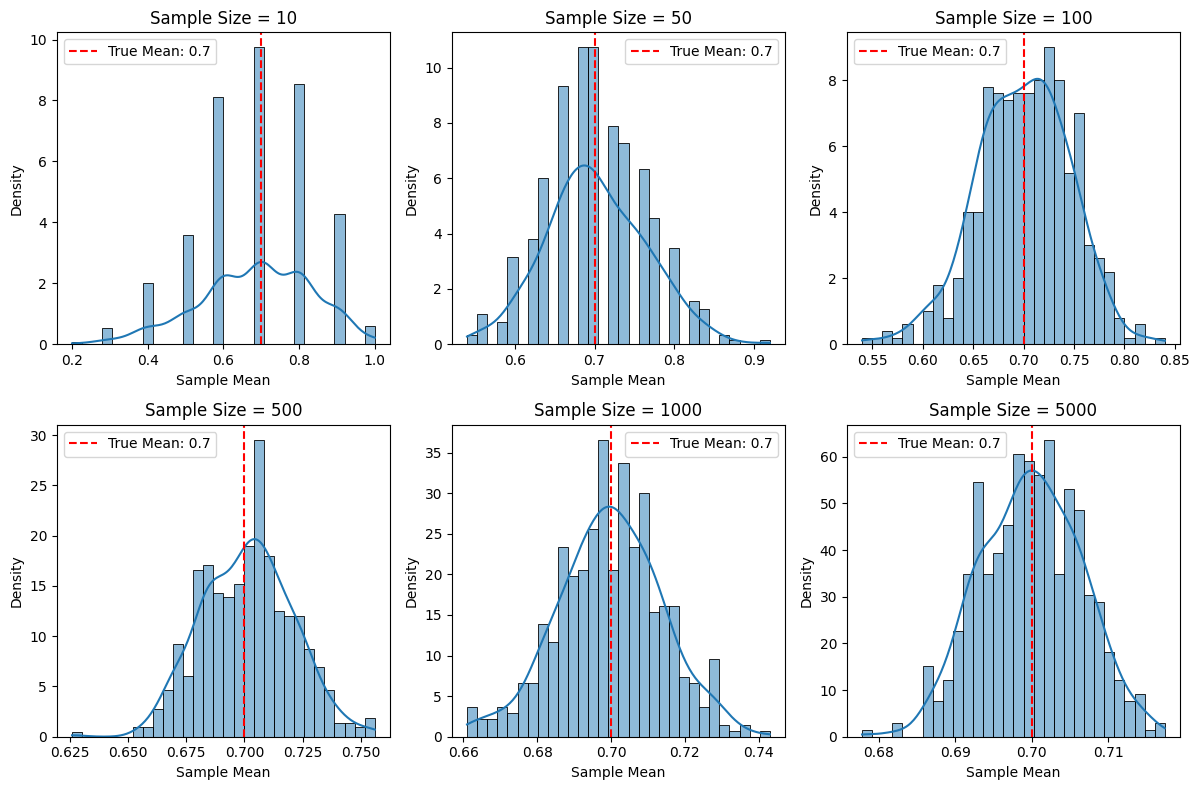

In [16]:
# Set Bernoulli distribution parameter
p = 0.7  # Probability of success
true_mu = p  # The true mean of the Bernoulli distribution
n_trials = [10, 50, 100, 500, 1000, 5000]  # Sample sizes
num_simulations = 500  # Number of simulations to estimate the distribution of the sample mean

# Step 1: Generate sample means for different sample sizes
sample_means_dict = {}

for n in n_trials:
    sample_means = [np.mean(np.random.binomial(1, p, n)) for _ in range(num_simulations)]
    sample_means_dict[n] = sample_means

# Step 2: Plot histograms of the sample means for different sample sizes
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_trials, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sample_means_dict[n], bins=30, kde=True, stat="density")
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.axvline(x=true_mu, color='r', linestyle='--', label=f'True Mean: {true_mu}')
    plt.legend()

plt.tight_layout()
plt.show()